In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)

2.9.2


In [3]:
fmnist = tf.keras.datasets.fashion_mnist

In [4]:
(X_train , y_train) , (X_test , y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

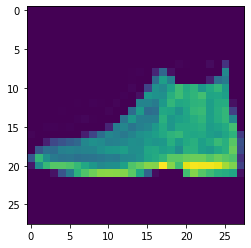

In [17]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {y_test[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {X_test[index]}')

# Visualize the image
plt.imshow(X_test[index])

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128 , activation = "relu"),
    tf.keras.layers.Dense(units = 10 , activation = "linear")
])

In [8]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

In [12]:
model.fit(X_train , y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3759
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3741
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3627
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3653
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3630
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3583
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3540
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3585
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3502
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3462


In [13]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4635


0.4634571671485901

In [14]:
classifications = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
print(np.argmax(classifications[0]))

9


In [28]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch , logs = {}):
        if (logs.get('loss') < 0.35):
            print("\nLoss is lower than expected!")
            self.model.stop_training = True

In [29]:
callbacks = myCallback()

In [30]:
model.fit(X_train , y_train , epochs = 10 , callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3355
Loss is lower than expected!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3355
